In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/howpop_train.csv')

In [12]:
data.drop(filter(lambda c: c.endswith('_lognorm'), data.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True)
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })


data['published'] = pd.to_datetime(data.published, yearfirst = True)
data['year'] = [d.year for d in data.published]
data['month'] = [d.month for d in data.published]
data['day'] = data.published.apply(lambda ts: ts.day)

data['dayofweek'] = [d.isoweekday() for d in data.published]
data['hour'] = [d.hour for d in data.published]

## 1. В каком месяце (и какого года) было больше всего публикаций?

In [13]:

data.groupby(['year', 'month'])[['title']].count().sort_values('title', ascending = False).head()
# март 2015

title
year month       
2015 3       2189
2016 3       2115
2015 7       2111
     4       2110
     12      2084

## 2.Проанализируйте публикации в месяце из предыдущего вопроса

* Один или несколько дней сильно выделяются из общей картины
* На хабре всегда больше статей, чем на гиктаймс
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

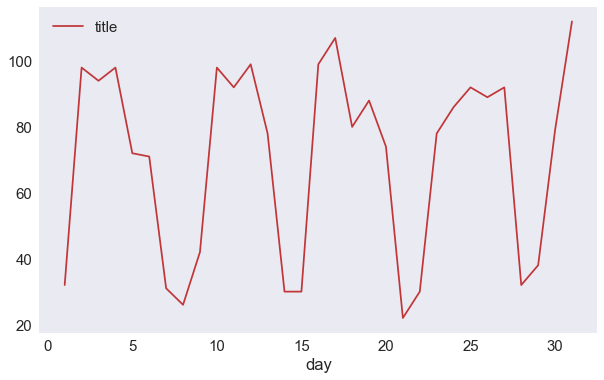

In [16]:


march_df = data[(data.month == 3) & (data.year == 2015)]

march_df.groupby(['day'])[['title']].count().plot(figsize=(10,6))#2.1 false

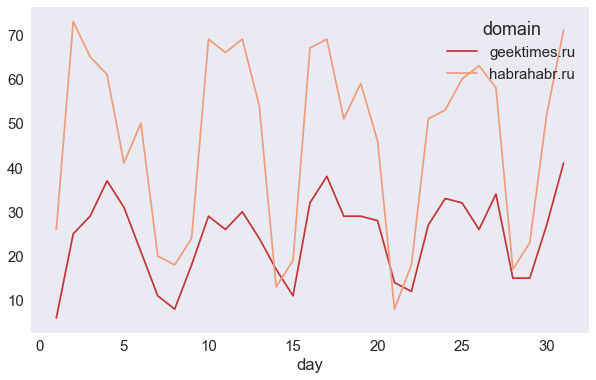

In [17]:
march_df.pivot_table(index = 'day' , columns = 'domain', values = 'title' , aggfunc = 'count').plot(figsize=(10,6))
#2.2 False

In [18]:
march_df[march_df.dayofweek == 6].pivot_table(index = 'day' , columns = 'domain', 
                                              values = 'title' , aggfunc = 'count')
#2.3 TRue

domain,geektimes.ru,habrahabr.ru
day,,
7,11,20
14,17,13
21,14,8
28,15,17


## 3\.
* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [21]:
data.groupby('hour')[['views']].mean().sort_values('views', ascending = False).head()
#3.1 - false
#3.3 - true

,views
hour,
6,21354.310115
4,20678.389091
7,19093.953408
3,18370.017972
22,18365.387460


In [22]:
data.groupby('hour')[['comments']].mean().sort_values('comments', ascending = False).head()
#3.2 - false

,comments
hour,
4,53.657273
3,53.123877
6,51.799618
1,49.417910
2,48.827025


In [23]:
data[data.domain == 'geektimes.ru'].sort_values('comments', ascending = False).head(1)
#3.4 - false

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,day
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2,1


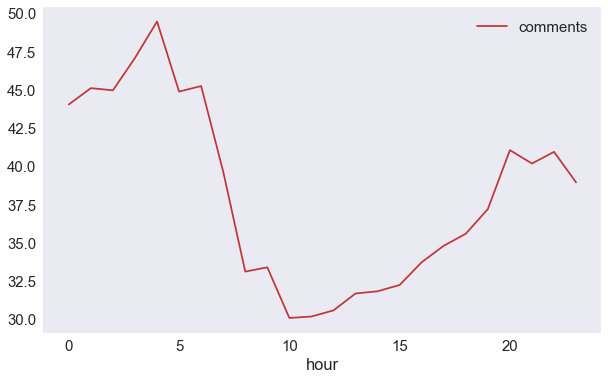

In [26]:
data[data.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot(figsize=(10,6))
#3.5 - false

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [29]:
data[data.author.isin([
    '@Mordatyj', '@Mithgol', 
    '@alizar', '@ilya42'])].groupby('author')[['votes_minus']].mean().sort_values\
    ('votes_minus', ascending = False)
    
#4 @Mithgol

,votes_minus
author,
@Mithgol,20.481081
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

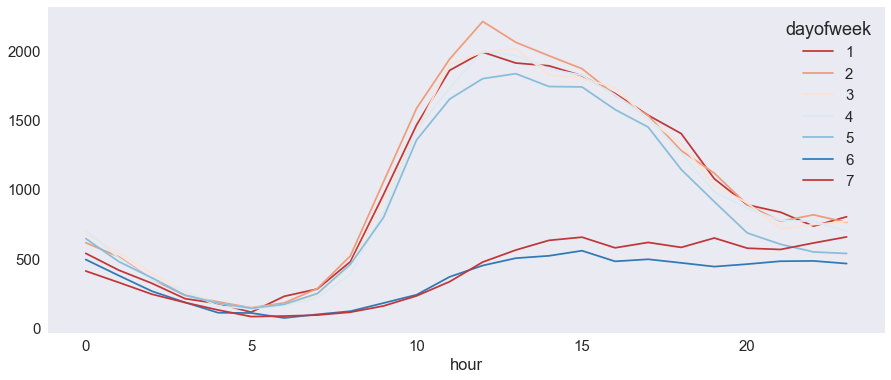

In [33]:
tmp_df = data.pivot_table(index='hour', values='title', 
                        aggfunc='count', columns='dayofweek')
tmp_df.plot(figsize=(15,6));
#5 False